In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap, MDS
from sklearn.preprocessing import StandardScaler



# PREPROCES

In [17]:
data = pd.read_csv('data/cases_df.csv')
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)


In [ ]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_cols])


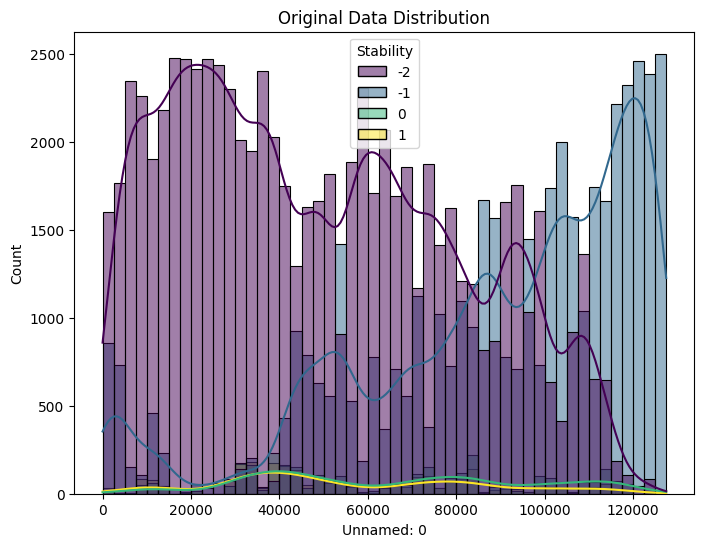

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x=numeric_cols[0], hue='Stability', kde=True, palette='viridis')
plt.title('Original Data Distribution')
plt.show()


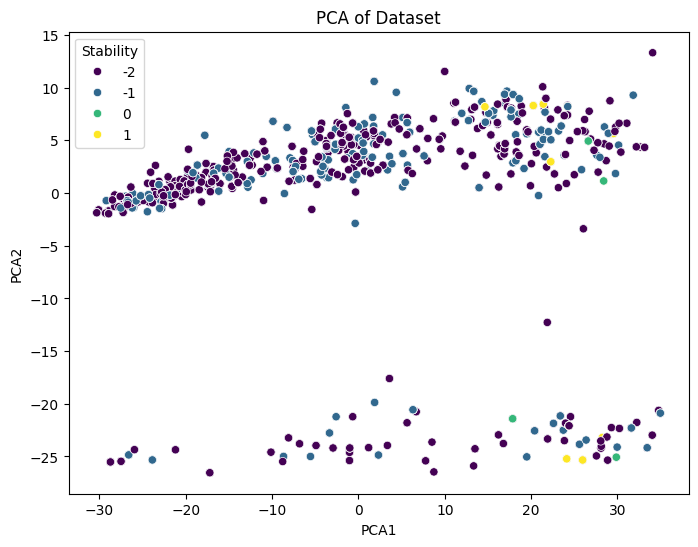

In [29]:
pca = PCA(n_components=2)
data_pca_df = pd.DataFrame(pca.fit_transform(data_scaled), columns=['PCA1', 'PCA2'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=data_pca_df, hue=data['Stability'], palette='viridis')
plt.title('PCA of Dataset')
plt.show()

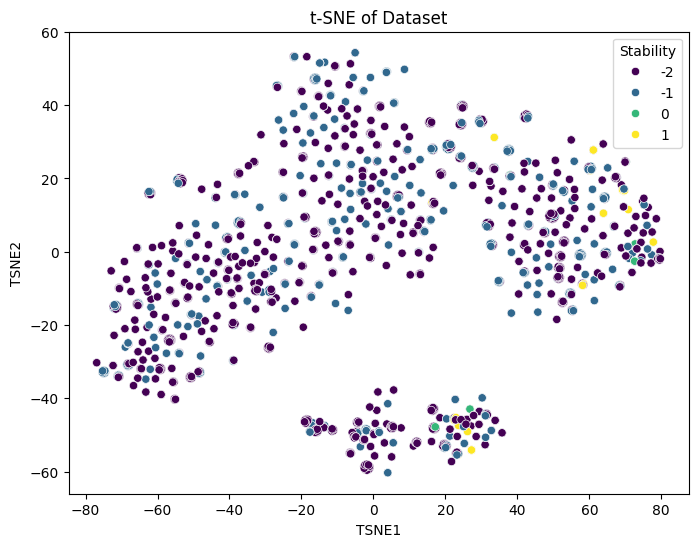

In [28]:
tsne = TSNE(n_components=2, random_state=42)
data_tsne_df = pd.DataFrame(tsne.fit_transform(data_scaled), columns=['TSNE1', 'TSNE2'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', data=data_tsne_df, hue=data['Stability'], palette='viridis')
plt.title('t-SNE of Dataset')
plt.show()


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 80 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._

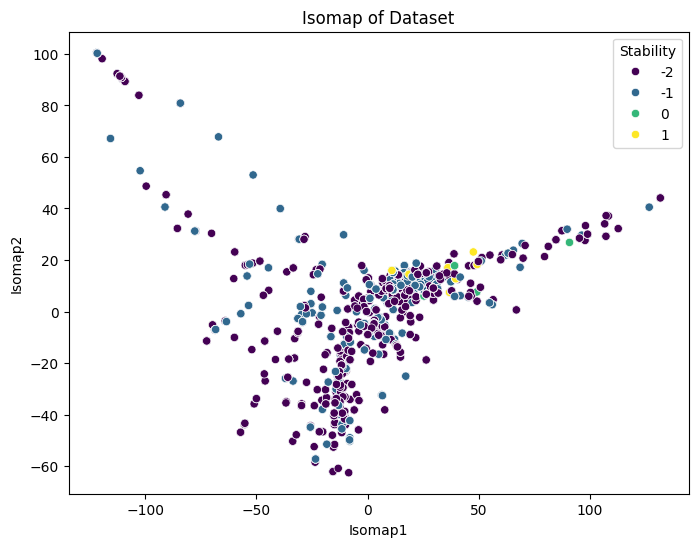

In [27]:
isomap = Isomap(n_components=2)
data_isomap_df = pd.DataFrame(isomap.fit_transform(data_scaled), columns=['Isomap1', 'Isomap2'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Isomap1', y='Isomap2', data=data_isomap_df, hue=data['Stability'], palette='viridis')
plt.title('Isomap of Dataset')
plt.show()


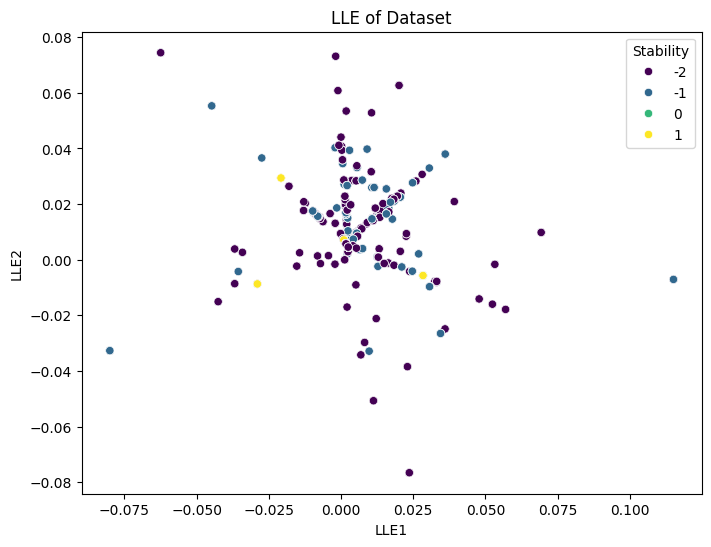

In [26]:
lle = LocallyLinearEmbedding(n_components=2, random_state=42, eigen_solver='dense', n_neighbors=10)
data_lle_df = pd.DataFrame(lle.fit_transform(data_scaled), columns=['LLE1', 'LLE2'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LLE1', y='LLE2', data=data_lle_df, hue=data['Stability'], palette='viridis')
plt.title('LLE of Dataset') 
plt.show()

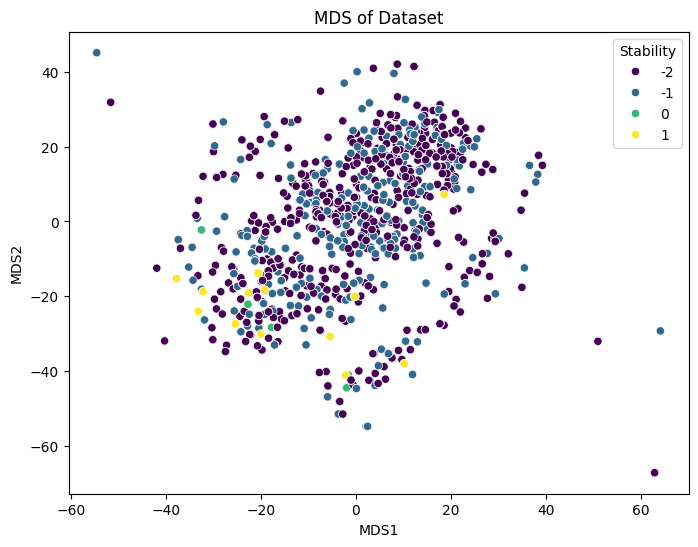

In [35]:
X_pca = PCA(n_components=50).fit_transform(data_scaled)
mds = MDS(
    n_components=2,
    random_state=42,
    n_init=4,          
    max_iter=300,      
    n_jobs=-1         
)
data_mds_df = pd.DataFrame(mds.fit_transform(X_pca), columns=['MDS1', 'MDS2'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MDS1', y='MDS2', data=data_mds_df, hue=data['Stability'], palette='viridis')
plt.title('MDS of Dataset')
plt.show()

In [3]:
img = mpimg.imread("C:\\Users\\Usuario\\Downloads\\NREL118bus.png")
case_df_op = pd.read_csv("data\\case_df_op.csv")
case_df_op.dropna(inplace=True)
case_df_op.drop_duplicates(inplace=True)

'\nfor _, row in node_pos.iterrows():\n    plt.text(\n        row["x"]-15,\n        row["y"]-3,\n        f"{V_values[int(row[\'node_id\'])-1]:.3f}",  # 3 decimals\n        color=cmap(norm(V_values[int(row[\'node_id\'])-1])),\n        fontsize=7,\n        weight="bold"\n    )\n    '

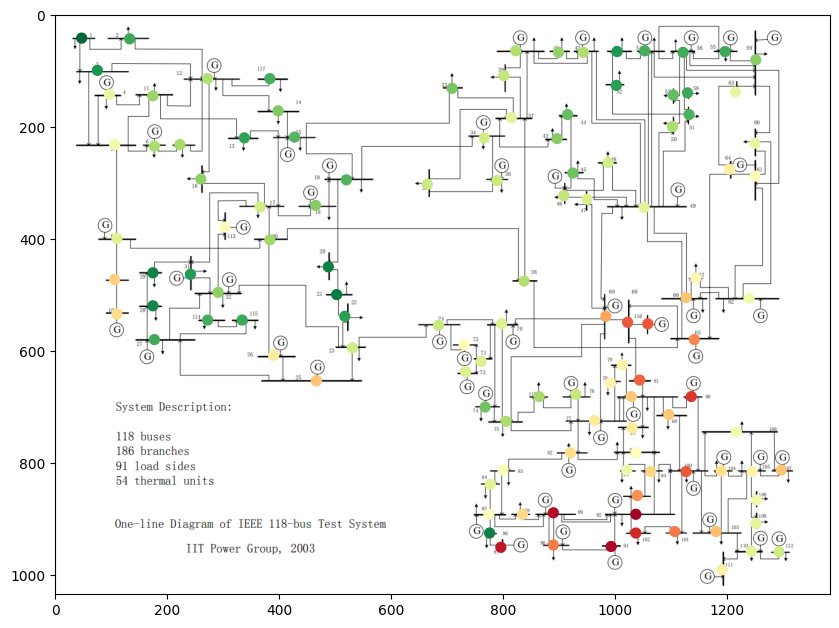

In [4]:
from matplotlib import cm
from matplotlib.colors import Normalize

data_V = case_df_op.filter(regex="^V")
node_pos = pd.read_csv("node_positions.csv")

idx = 0
V_values = data_V.iloc[idx].values
plt.figure(figsize=(10, 10))
plt.imshow(img)
cmap = cm.get_cmap("RdYlGn_r") 
norm = Normalize(vmin=data_V.min().min(), vmax=data_V.max().max())
plt.scatter(node_pos["x"], node_pos["y"], c=V_values, cmap=cmap, s=50)

"""
for _, row in node_pos.iterrows():
    plt.text(
        row["x"]-15,
        row["y"]-3,
        f"{V_values[int(row['node_id'])-1]:.3f}",  # 3 decimals
        color=cmap(norm(V_values[int(row['node_id'])-1])),
        fontsize=7,
        weight="bold"
    )
    """


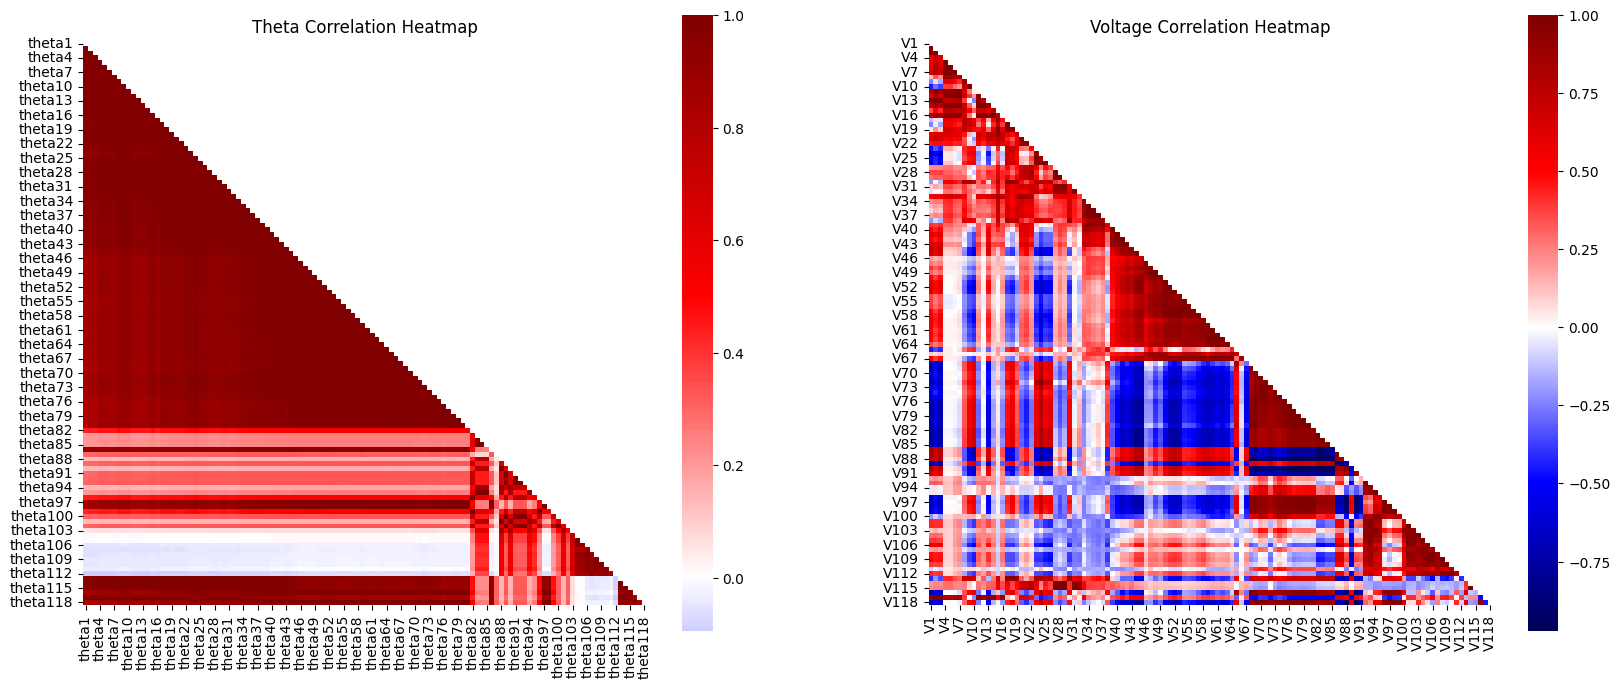

In [24]:
data_V = case_df_op.filter(regex="^V")
data_theta = case_df_op.filter(regex="^theta")
corr_theta = data_theta.corr(numeric_only=True)
mask_theta = np.triu(np.ones_like(corr_theta, dtype=bool))
corr_V = data_V.corr(numeric_only=True)
mask_V = np.triu(np.ones_like(corr_V, dtype=bool))
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(corr_theta, mask=mask_theta, cmap='seismic',  center=0, square=True, ax=ax[0])
ax[0].set_title('Theta Correlation Heatmap')
sns.heatmap(corr_V, mask=mask_V, cmap='seismic', center=0, square=True, ax=ax[1])
ax[1].set_title('Voltage Correlation Heatmap')
plt.show()

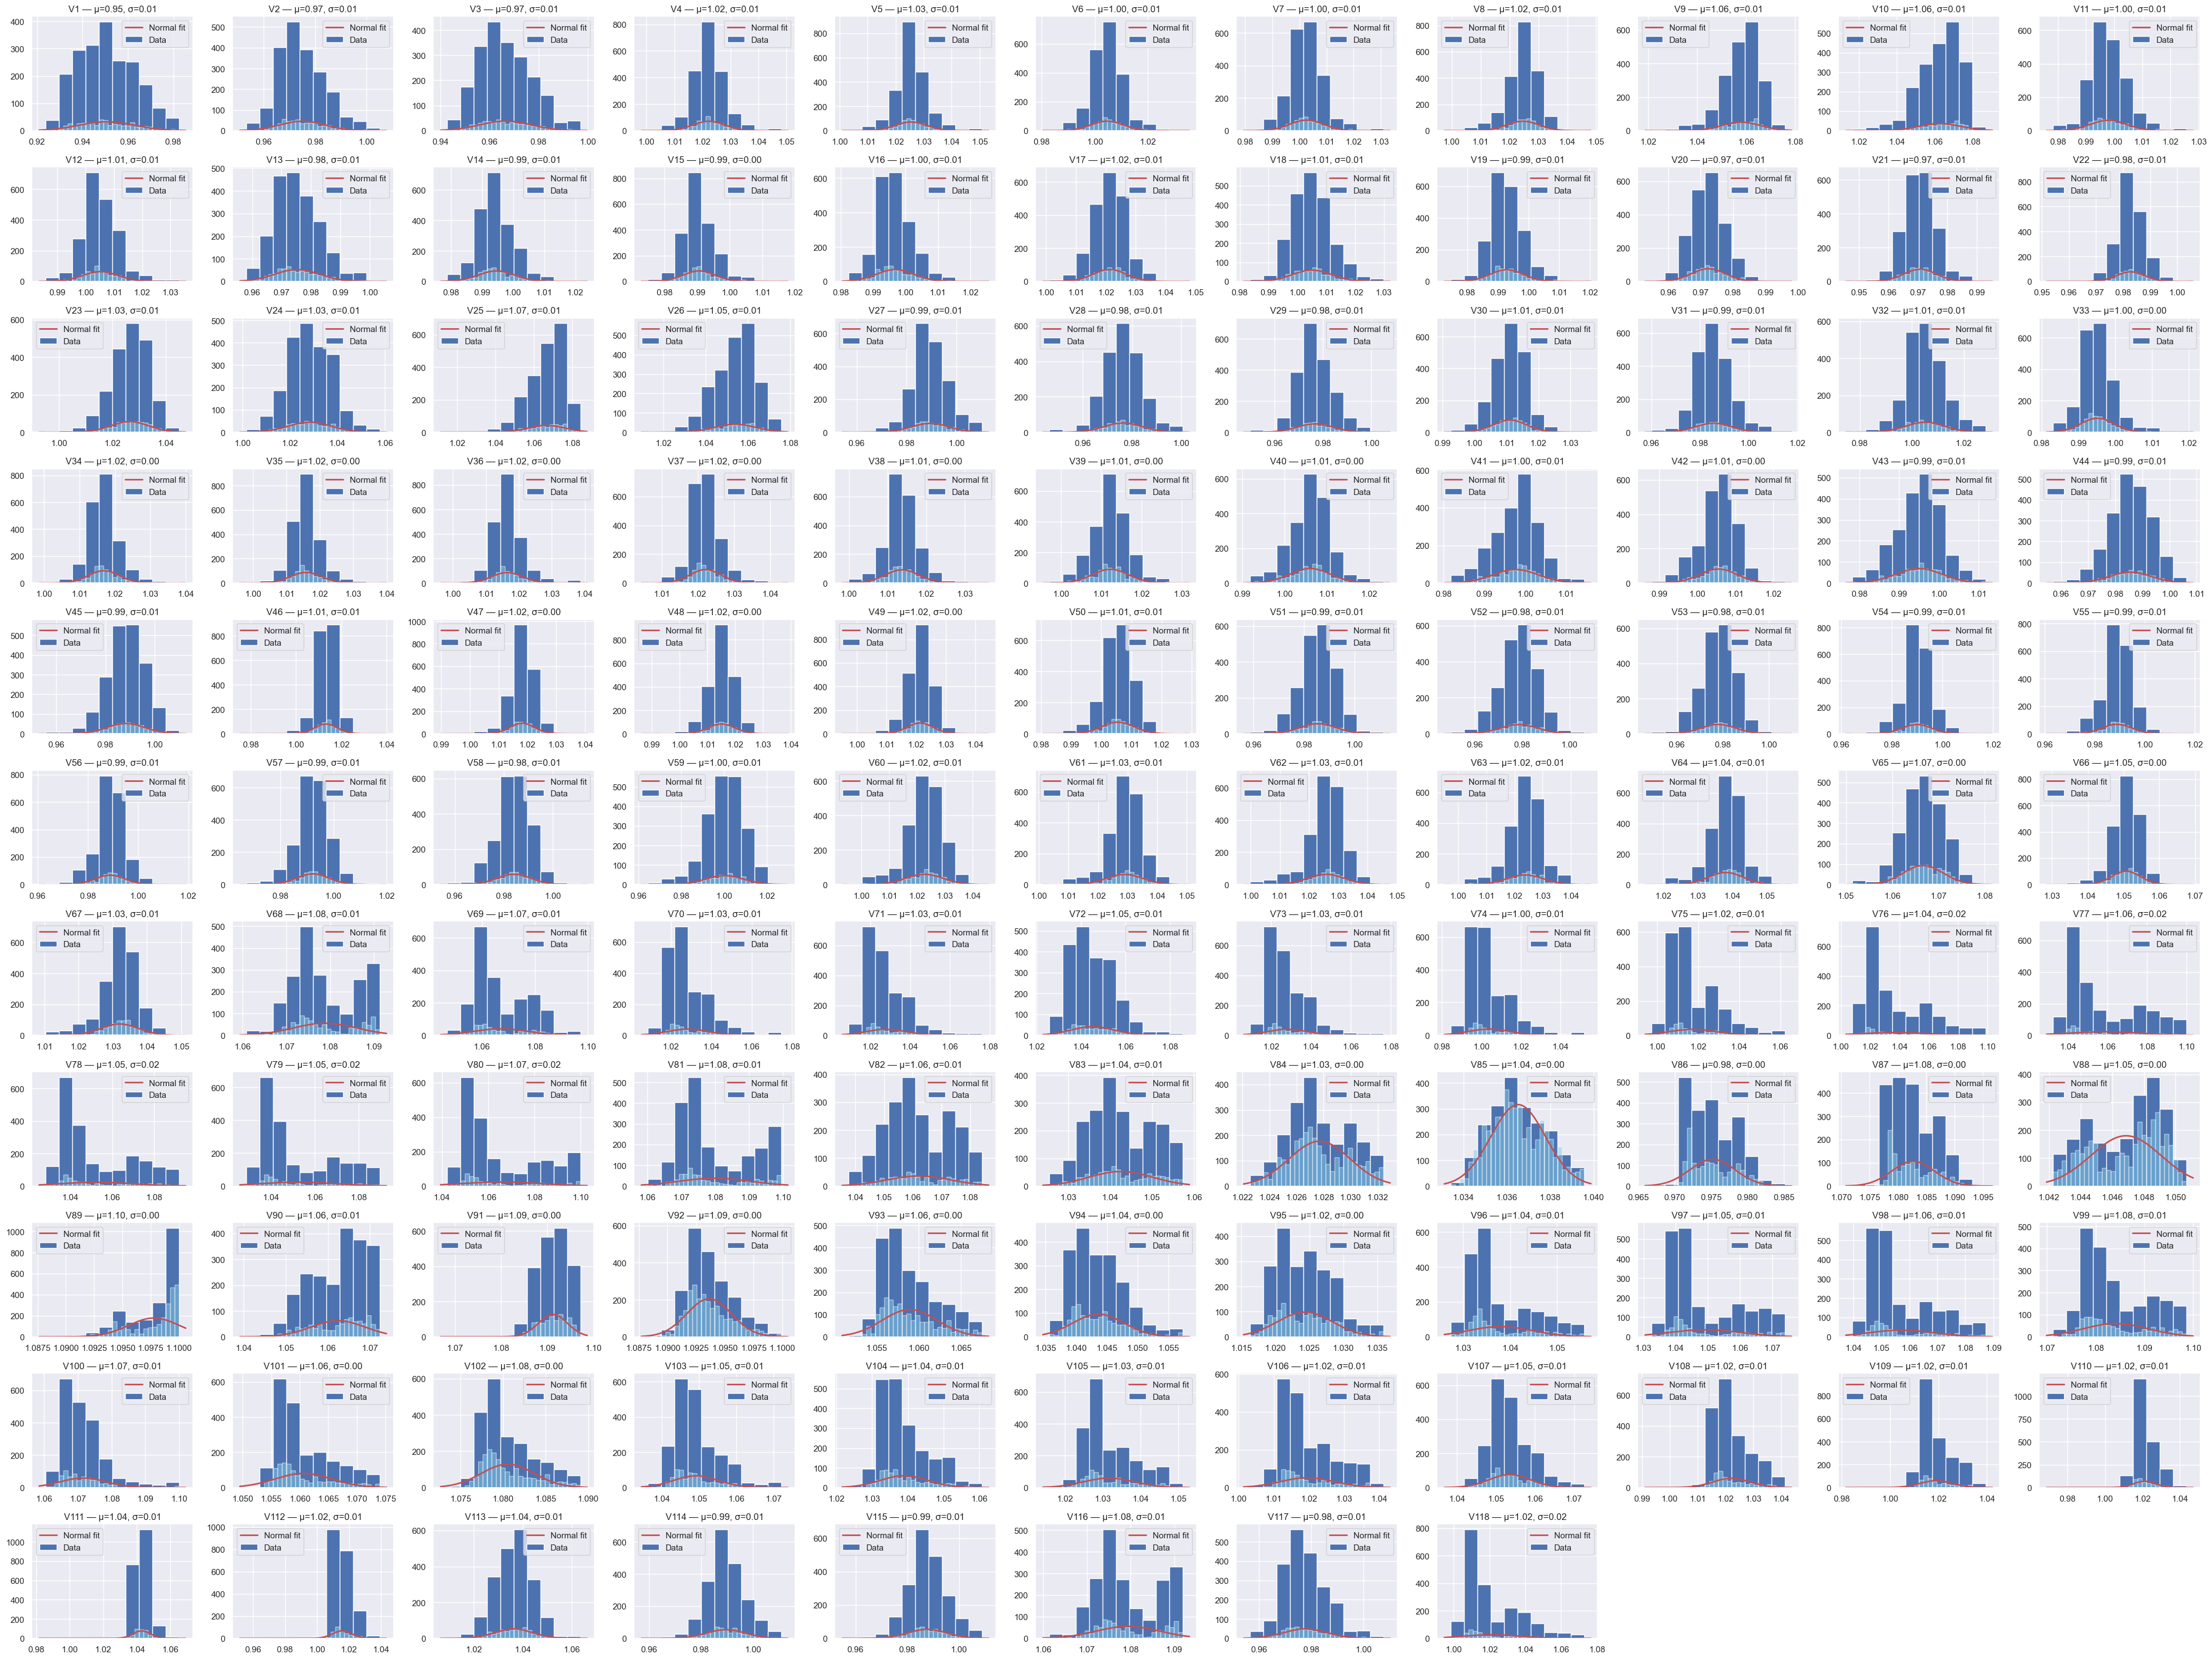

In [ ]:
from scipy.stats import norm
data_V = case_df_op.filter(regex="^V")

ax = data_V.hist(figsize=(40, 30))

for i, column in enumerate(data_V.columns):
    a = ax.flatten()[i]
    mu, std = norm.fit(data_V[column].dropna())
    xmin, xmax = a.get_xlim()
    x = np.linspace(xmin, xmax, 1000)
    p = norm.pdf(x, mu, std)
    n, bins, patches = a.hist(data_V[column].dropna(), bins=30, alpha=0.5, color='skyblue', density=True)
    a.plot(x, p, 'r', linewidth=2)
    a.set_title(f"{column} — μ={mu:.2f}, σ={std:.2f}")
    a.legend(['Normal fit', 'Data'])

plt.tight_layout()
plt.show()

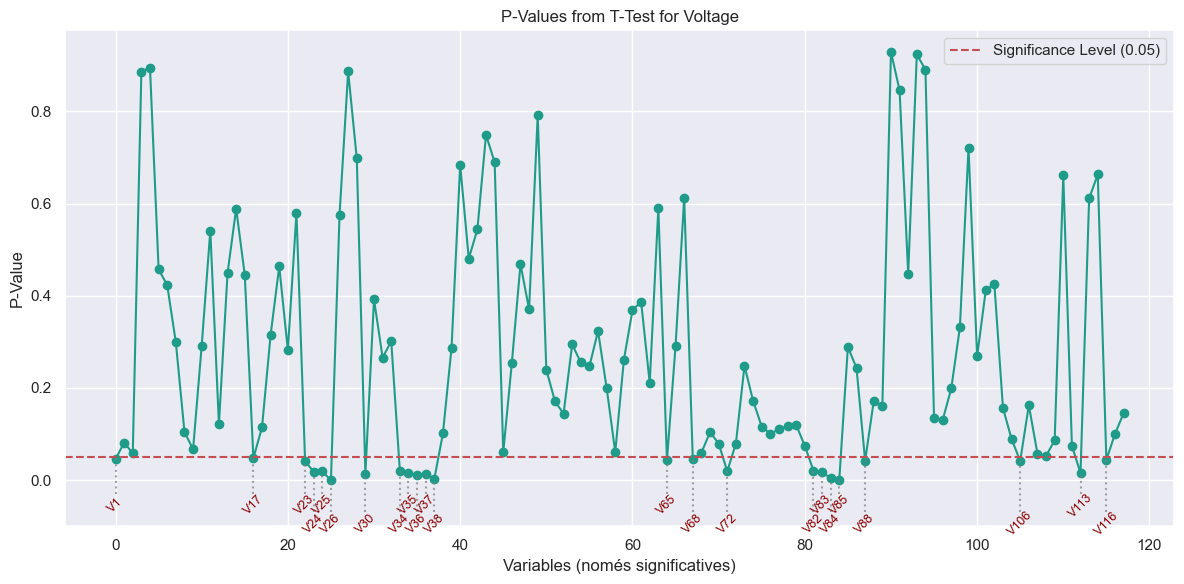

In [98]:
from scipy.stats import ttest_ind

p_values = []
variable_names = []
for x in range(1, 119):
    t_stat, p_value = ttest_ind(case_df_op[case_df_op['Stability']==1][[f'V{x}']], case_df_op[case_df_op['Stability']==0][[f'V{x}']])
    p_values.append(p_value)
    variable_names.append(f'V{x}')

plt.figure(figsize=(12, 6))
plt.plot(p_values, marker='o', linestyle='-', color=sns.color_palette("viridis", as_cmap=True)(0.55))
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (0.05)')

for i, p in enumerate(p_values):
    if p <= 0.05:
        offset = -0.03 if i % 2 == 0 else -0.07
        plt.vlines(x=i, ymin=offset, ymax=p, color='gray', linestyle=':', alpha=0.7)
        plt.text(i, offset-0.025, variable_names[i], ha='center', va='center', rotation=45, fontsize=9, color='darkred')

plt.xlabel('Variables (només significatives)')
plt.ylabel('P-Value')
plt.title('P-Values from T-Test for Voltage')
plt.legend()
plt.ylim(-0.1, max(p_values) * 1.05)
plt.tight_layout()
plt.show()